# 「ベイズ推論による機械学習入門」P.64 多次元ガウス分布

## 多次元ガウス分布

* 定義
$$\mathcal{N}(\mathbf{x} | \mathbf{\mu}, \mathbf{\Sigma}) = \frac{1}{\sqrt{(2\pi)^D |\Sigma|}} \exp\Bigr\{-\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu}) \Bigr\} $$
$$\mathbf{x} \in \mathbb{R}^D \quad \mathbf{\mu} \in \mathbb{R}^D \quad \mathbf{\Sigma} \in \mathbb{R}^{D \times D}$$

* 対数表示
$$\ln \mathcal{N}(\mathbf{x} | \mathbf{\mu}, \mathbf{\Sigma}) = -\frac{1}{2}\Bigr\{(\mathbf{x} - \mathbf{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu}) + \ln |\mathbf{\Sigma}| + D\ln2\pi \Bigr\}$$

### 多次元ガウス分布

In [1]:
using LinearAlgebra

function MultivariateGaussian(x...; μ, Σ)
    D = length(μ)
    Λ = inv(Σ)
    cons = 1 / √((2π)^D * det(Σ))
    cons * exp(-0.5 * (x .- μ)' * Λ * (x .- μ))
end

MultivariateGaussian (generic function with 1 method)

### パラメータの設定を変えた時の確率密度のグラフ

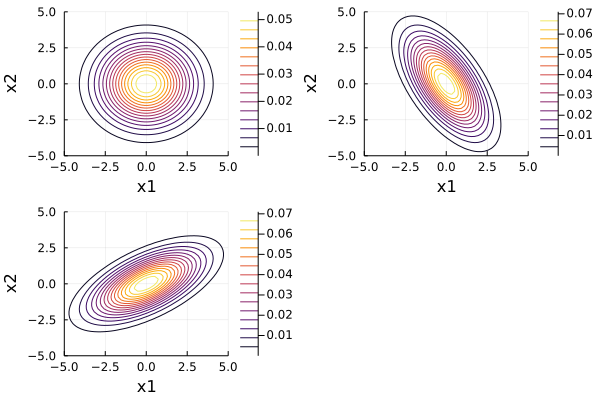

In [2]:
# x軸を設定
x1 = range(-5, 5, length=50)
x2 = range(-5, 5, length=50)

# μを設定
μ = [
    0.0 
    0.0
]

# ケース1
Σ1 = [
    3.0 0.0
    0.0 3.0
]

z1 = MultivariateGaussian.(x1', x2; μ=μ, Σ=Σ1)

# ケース2
Σ2 = [
    2.0 -√3
    -√3 4.0
]

z2 = MultivariateGaussian.(x1', x2; μ=μ, Σ=Σ2)

# ケース3
Σ3 = [
    4.0 √3
    √3 2.0
]

z3 = MultivariateGaussian.(x1', x2; μ=μ, Σ=Σ3)

using Plots
plot(contour(x1, x2, z1), contour(x1, x2, z2), contour(x1, x2, z3))
plot!(xlabel="x1", ylabel="x2")

#### 可変引数関数の使い方の確認

引数の数が任意個の場合に、引数の後に省略記号をつけることで定義できる。

In [3]:
function f(x...; b)
    x .- b
end

f (generic function with 1 method)

In [4]:
x1 = range(-5, 5, length=10)
x2 = range(-5, 5, length=10)
b = 0
f.(x1', x2; b)

10×10 Array{Tuple{Float64,Float64},2}:
 (-5.0, -5.0)       (-3.88889, -5.0)       …  (5.0, -5.0)
 (-5.0, -3.88889)   (-3.88889, -3.88889)      (5.0, -3.88889)
 (-5.0, -2.77778)   (-3.88889, -2.77778)      (5.0, -2.77778)
 (-5.0, -1.66667)   (-3.88889, -1.66667)      (5.0, -1.66667)
 (-5.0, -0.555556)  (-3.88889, -0.555556)     (5.0, -0.555556)
 (-5.0, 0.555556)   (-3.88889, 0.555556)   …  (5.0, 0.555556)
 (-5.0, 1.66667)    (-3.88889, 1.66667)       (5.0, 1.66667)
 (-5.0, 2.77778)    (-3.88889, 2.77778)       (5.0, 2.77778)
 (-5.0, 3.88889)    (-3.88889, 3.88889)       (5.0, 3.88889)
 (-5.0, 5.0)        (-3.88889, 5.0)           (5.0, 5.0)